In [187]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
import seaborn as sns

def circle_position(r, x_tip, y_tip, number_pint =40):
    degree = np.array([i for i in range(0, number_pint)])*np.pi/(number_pint/2)
    x = r * np.cos(degree) + x_tip
    y = r * np.sin(degree) + y_tip
    return degree, np.round(x,0).astype('int'), np.round(y,0).astype('int')

def circle_value(image_array, x_list, y_list,):
    c = []
    for x_, y_ in zip(x_list, y_list):
        c.append(image_array[y_, x_])
    return c

img_paths = glob.glob('./data/exy/testA/*')
fake_img_paths = glob.glob('./data/exy/result/*')

img_number = 0


img = np.load(img_paths[img_number])
fake_img = np.load(fake_img_paths[img_number])
fake_img = np.reshape(fake_img,(128,128))

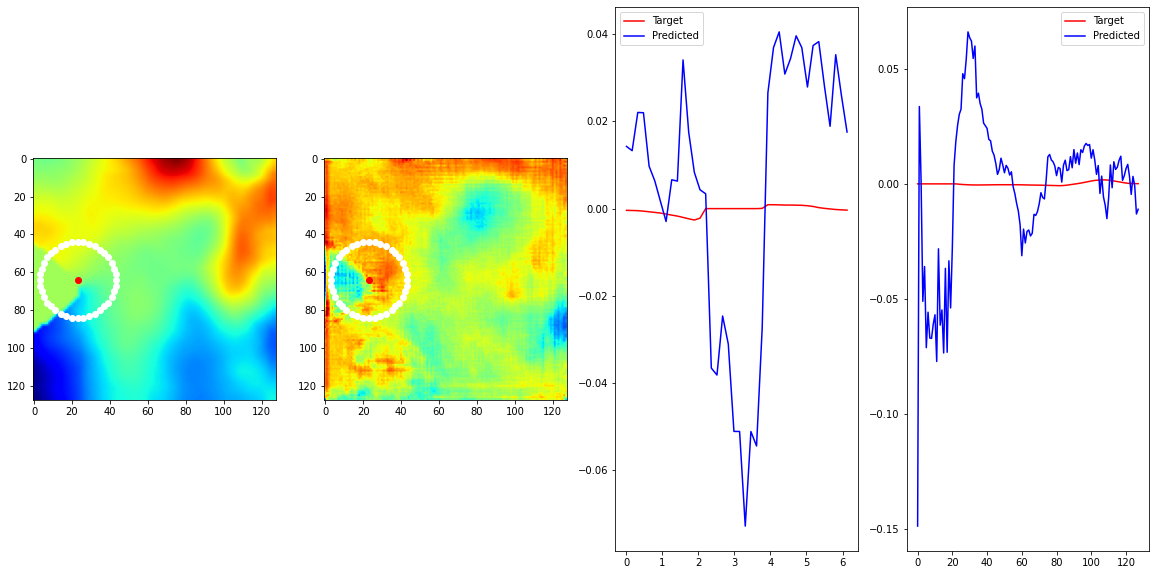

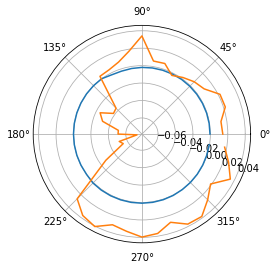

In [194]:
crack_tip = [23,64] #x,y

degree, x, y =  circle_position(20, crack_tip[0], crack_tip[1])
pixel_value = circle_value(img, x, y)
fake_pixel_value = circle_value(fake_img, x, y)


fig, ax = plt.subplots(1,4,figsize=(20,10))
ax[0].imshow(img, cmap='jet')
ax[0].scatter(crack_tip[0],crack_tip[1], c='red')
ax[0].scatter(x, y,color='white')

ax[1].imshow(fake_img, cmap='jet')
ax[1].scatter(crack_tip[0],crack_tip[1], c='red')
ax[1].scatter(x, y,color='white')

ax[2].plot(degree, pixel_value,color ='red',label='Target')
ax[2].plot(degree, fake_pixel_value, color= 'blue',label='Predicted')
ax[2].legend()

ax[3].plot([i for i in range(128)], img[crack_tip[1],:],color ='red',label='Target')
ax[3].plot([i for i in range(128)], fake_img[crack_tip[1],:], color= 'blue',label='Predicted')
ax[3].legend()
plt.show()
plt.close()

fig, ax = plt.subplots(1,1,subplot_kw={'projection': 'polar'})
ax.plot(degree, pixel_value)
ax.plot(degree, fake_pixel_value)
# ax.set_rticks([-0.0005, 0, 0.0005])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

plt.show()


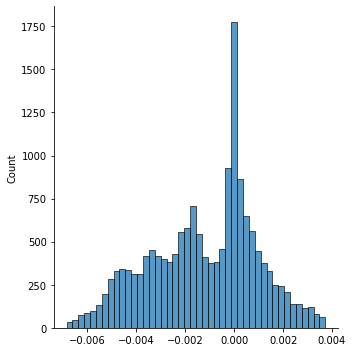

In [129]:
aaa = np.reshape(img,(-1,))
sns.displot(aaa)